# _Bank Customer Churn Prediction Model_

improting required libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt


Load dataset

In [9]:
dataset = pd.read_csv("Bank Customer Churn Prediction.csv")

# Feature Description:

1. Customer ID - Unique ID given to identify a particular customer.
2. Credit Score - It is the score which determines the creditworthiness of a customer.
3. Country - The country where customer lives.
4. Gender - The Sex of customer.
5. Age - The age of customer.
6. Tenure - Number of years the customer has Bank Account in that Bank.
7. Balance - Amount of money present in customer's bank.
8. Products Number - Number of Products from that Bank.
9. Credit Card - Does the customer own a credit card of that Bank.
10. Active Member - Whether the customer is an active member of that Bank.
11. Estimated Salary - Total Income of the Customer.
12. Churn - Churn (Loss of existing customers) of the Bank.

In [10]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,customer_churned
0,15634602.00,619.00,France,Female,42.00,2.00,0.00,1.00,1.00,1.00,101348.88,1
1,15647311.00,608.00,Spain,Female,41.00,1.00,83807.86,1.00,0.00,1.00,112542.58,0
2,15619304.00,502.00,France,Female,42.00,8.00,159660.80,3.00,1.00,0.00,113931.57,1
3,15701354.00,NaN,France,Female,39.00,1.00,0.00,2.00,0.00,0.00,93826.63,0
4,15737888.00,850.00,Spain,Female,43.00,2.00,125510.82,1.00,1.00,1.00,79084.10,0


Drop the 'customer_id' column as it's unique for each customer and doesn't provide useful information

In [11]:
df = dataset.drop("customer_id", axis=1)

# Graphical representation of the dataset
Providing information about the data distribution in the dataset

array([[<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>,
        <Axes: title={'center': 'credit_card'}>],
       [<Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>,
        <Axes: title={'center': 'customer_churned'}>]], dtype=object)

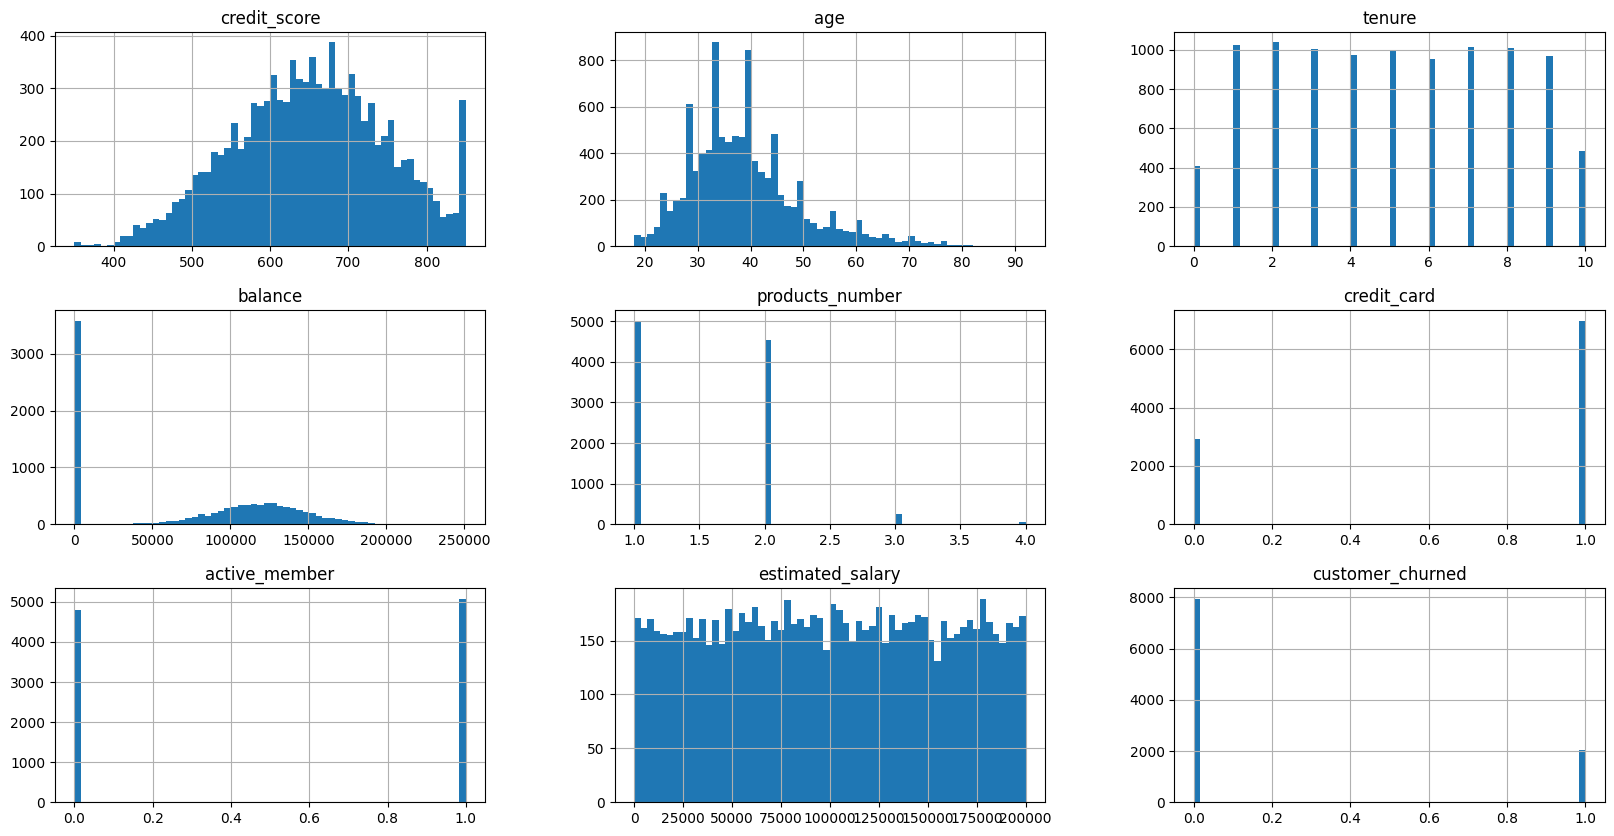

In [12]:
df.hist(bins=60, figsize=(20,10))

Check for missing values

In [13]:
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
credit_score         28
country              76
gender              101
age                 103
tenure              108
balance             108
products_number     128
credit_card          99
active_member       129
estimated_salary    149
customer_churned      0
dtype: int64


Drop rows with missing values

In [14]:
df = df.dropna()

 Convert categorical variables into numerical using factorization

In [15]:
df['gender'] = pd.factorize(df['gender'])[0]
df['country'] = pd.factorize(df['country'])[0]

 Drop 'Country' and 'Gender' columns as they are now encoded

In [16]:
df = df.drop(['country', 'gender'], axis=1)

Split data into features and target variable
1. X is feature variable
2. Y is target variable

In [17]:
X = df.drop('customer_churned', axis=1)
Y = df['customer_churned']

Split data into train and test sets
split ratio = train : test
60 : 40

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

 Check class balance

In [19]:
print("Class distribution in target variable:")
print(Y_train.value_counts())

Class distribution in target variable:
customer_churned
0    4539
1    1157
Name: count, dtype: int64


Initialize LazyClassifier

In [20]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

 Fit LazyClassifier

In [21]:
try:
    models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

except Exception as e:
    print("Error occurred during fitting the LazyClassifier:", str(e))

 97%|█████████▋| 28/29 [00:09<00:00,  3.09it/s]

[LightGBM] [Info] Number of positive: 1157, number of negative: 4539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 5696, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203125 -> initscore=-1.366876
[LightGBM] [Info] Start training from score -1.366876


100%|██████████| 29/29 [00:09<00:00,  2.99it/s]


# models
Displays models and their performance

In [22]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.71,0.71,0.84,0.45
XGBClassifier,0.85,0.71,0.71,0.84,0.15
AdaBoostClassifier,0.85,0.70,0.70,0.83,0.39
RandomForestClassifier,0.85,0.70,0.70,0.84,1.68
ExtraTreesClassifier,0.85,0.69,0.69,0.84,0.62
NearestCentroid,0.69,0.69,0.69,0.72,0.01
BaggingClassifier,0.84,0.69,0.69,0.83,0.33
SVC,0.85,0.68,0.68,0.83,1.56
KNeighborsClassifier,0.84,0.67,0.67,0.82,0.15


# Sort models DataFrame by 'Accuracy' column

In [23]:
models.sort_values(by='Accuracy', inplace=True, ascending=False)

Create line plot

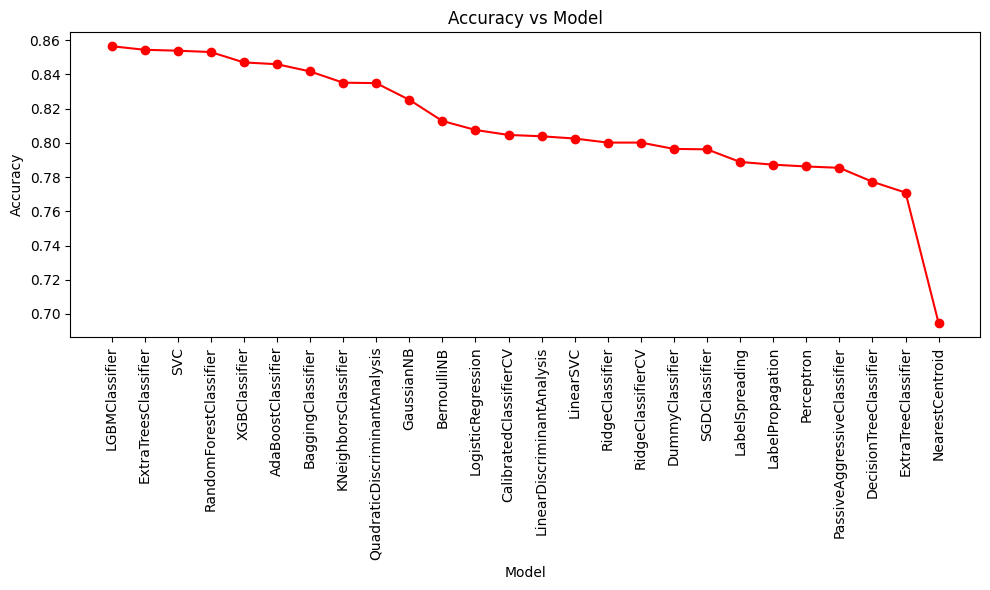

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(models.index, models['Accuracy'], marker='o', color='red', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

# Sort models DataFrame by 'Time Taken' column

In [25]:
models.sort_values(by='Time Taken', inplace=True, ascending=False)

Plot Time Taken vs Model

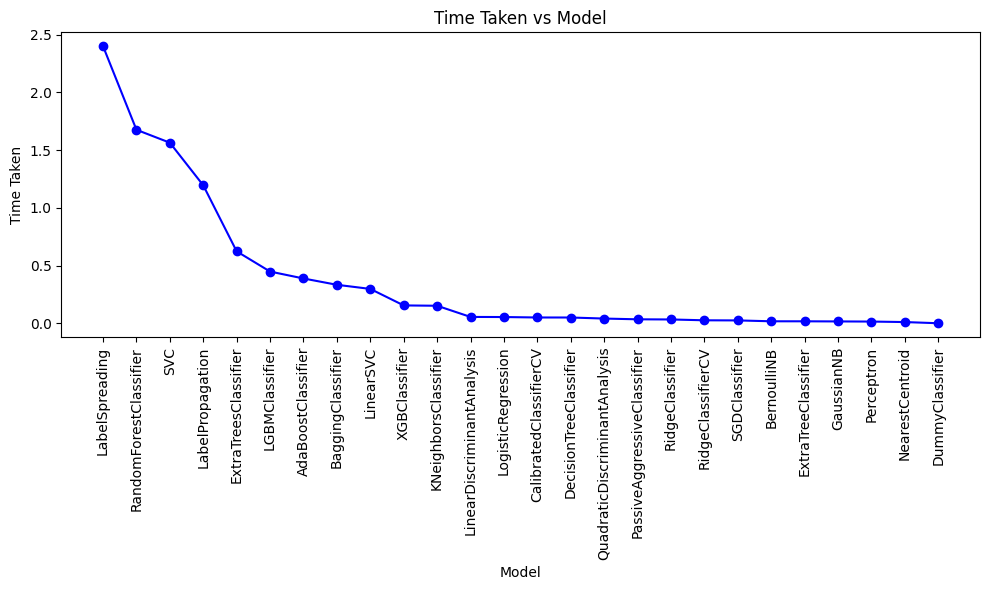

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(models.index, models['Time Taken'], marker='o', color='blue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Time Taken')
plt.title('Time Taken vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

# ID3

Initialize Decision Tree Classifier with the ID3 algorithm

In [27]:
dt_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_id3.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Visualize the decision tree built using ID3 algorithm

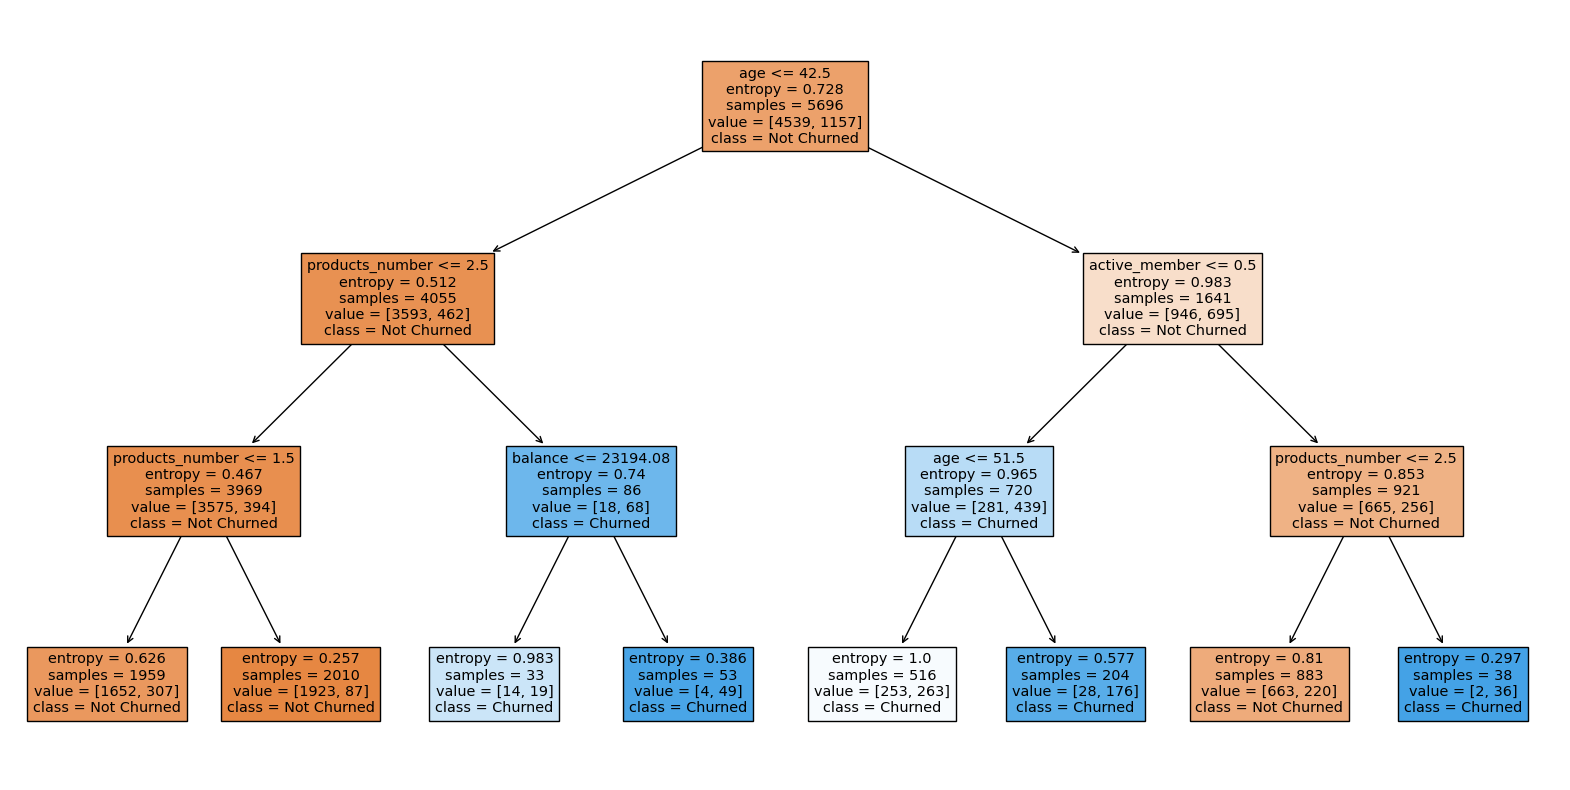

In [28]:
plt.figure(figsize=(20,10))
plot_tree(dt_id3, feature_names=list(X.columns), class_names=['Not Churned', 'Churned'], filled=True)
plt.show()

# C4.5

Initialize Decision Tree Classifier with the C4.5 algorithm (default in scikit-learn)

In [29]:
dt_c45 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_c45.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

Visualize the decision tree built using C4.5 algorithm

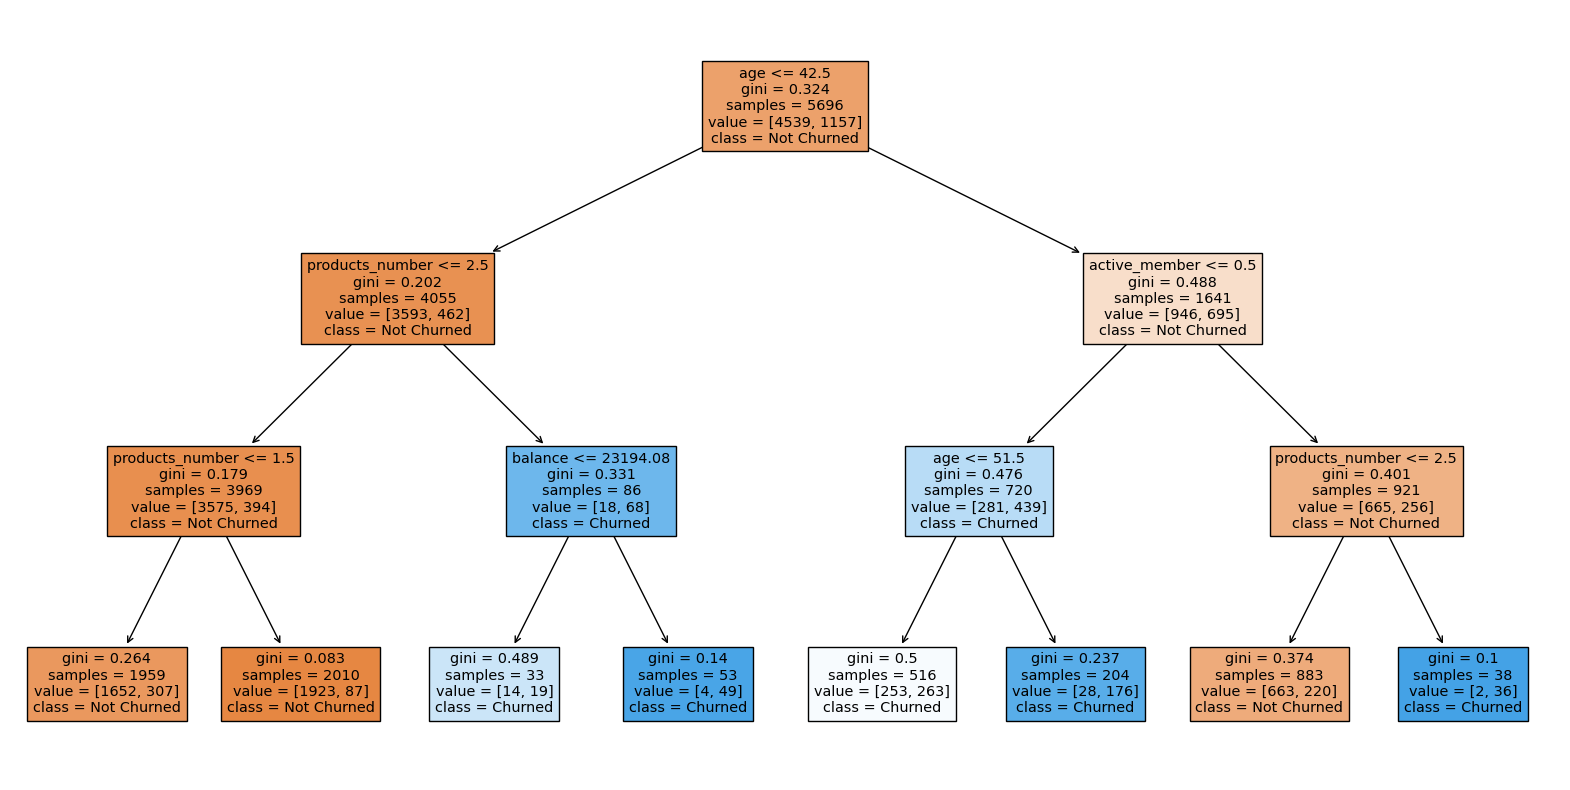

In [30]:
plt.figure(figsize=(20,10))
plot_tree(dt_c45, feature_names=list(X.columns), class_names=['Not Churned', 'Churned'], filled=True)
plt.show()

# CART

Initialize Decision Tree Classifier with the CART algorithm

In [31]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

Fit the model on the training data

In [32]:
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

Plot the decision tree

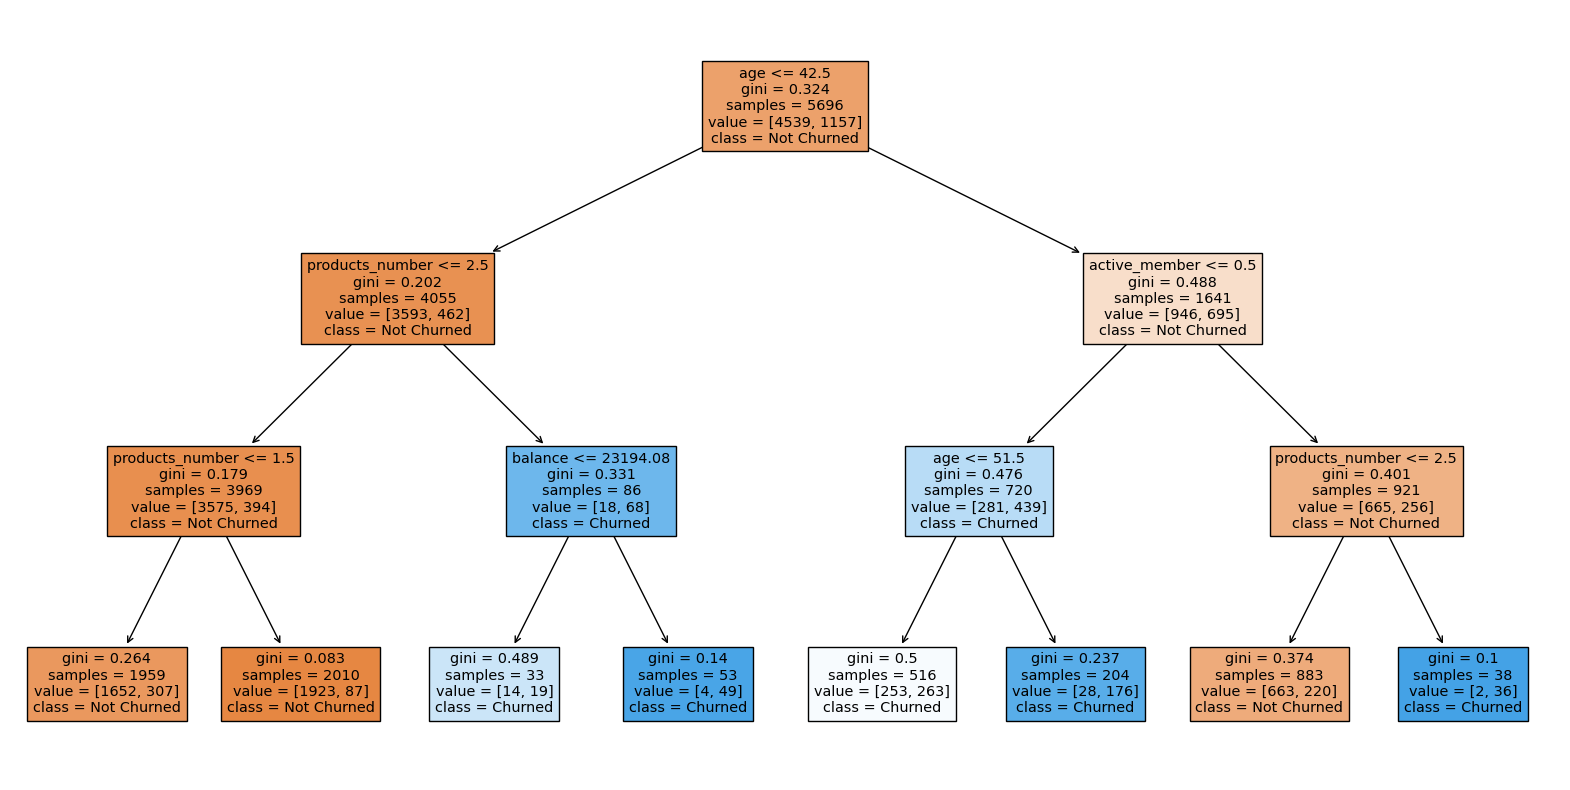

In [33]:
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True)
plt.show()